# Analysis of Video and Image Data for cropping and texture features
Author(s): Miguel Xochicale @mxochicale    
Contributor(s): 

## History
* 17th May 2022: Add prototype

## Summary


### How to run the notebook
1. Go to repository path: `$HOME/repositories/`
Open repo in pycharm and in the terminal type:
```
git checkout main # or the branch
git pull # to bring a local branch up-to-date with its remote version
```

2. Launch Notebook server. Go to you repository path: cd $HOME/repositories/ and type in the pycharm terminal:
```
conda activate *VE 
jupyter notebook --browser=firefox
```
which will open your web-browser.

## References 
1. https://stackoverflow.com/questions/45704999/how-to-convert-vector-wrapped-as-string-to-numpy-array-in-pandas-dataframe
2. https://github.com/YuxinZhaozyx/pytorch-VideoDataset/blob/master/datasets.py (Future work)
3. https://stackoverflow.com/questions/65446464/how-to-convert-a-video-in-numpy-array
4. https://matplotlib.org/stable/gallery/specialty_plots/mri_with_eeg.html#sphx-glr-gallery-specialty-plots-mri-with-eeg-py 
5. https://www.researchgate.net/publication/326881329_Medical_image_security_enhancement_using_two_dimensional_chaotic_mapping_optimized_by_self-adaptive_grey_wolf_algorithm 

    

## Setting imports and datasets paths

In [1]:
from scripts.utils.utils import video_to_tensor, compute_texture_array_and_plot
from scripts.utils.utils import get_and_plot_data_frame_of_texture_analysis
from scripts.utils.utils import get_and_plot_imu_data_analysis

import os
import pandas as pd
import seaborn as sns
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.feature import graycomatrix, graycoprops
from typing import Tuple, List

HOME_PATH = os.path.expanduser(f'~')
USERNAME = os.path.split(HOME_PATH)[1]
REPOSITORY_PATH='repositories/in2research2023'


###########################
###SET DATA_PATH 
DATA_PATH='scripts/sensor_fusion'
FULL_REPO_DATA_PATH = HOME_PATH +'/' + REPOSITORY_PATH +'/' + DATA_PATH


###########################
### experiments_23-aug-2022
AVI_FILE = 'testNN.avi'
CSV_FILE = 'testNN.avi.csv'

FULL_PATH_AND_AVI_FILE = os.path.join(FULL_REPO_DATA_PATH , AVI_FILE)
FULL_PATH_AND_CSV_FILE = os.path.join(FULL_REPO_DATA_PATH , CSV_FILE)


## Printing Versions and paths
print(f'PyTorch Version: {torch.__version__}')
print(f'pandas Version: {pd.__version__}')
print(f'seaborn Version: {sns.__version__}')
print(f'numpy Version: {np.__version__}')
print(f'cv2 Version: {cv2.__version__}')
print(f'skimage Version: {skimage.__version__}')

print(f'FULL_REPO_DATA_PATH: {FULL_REPO_DATA_PATH}')
print(f'FULL_PATH_AND_CSV_FILE: {FULL_PATH_AND_CSV_FILE}')
print(f'FULL_PATH_AND_AVI_FILE: {FULL_PATH_AND_AVI_FILE}')




PyTorch Version: 2.0.0.post200
pandas Version: 2.0.3
seaborn Version: 0.12.2
numpy Version: 1.25.1
cv2 Version: 4.8.0
skimage Version: 0.21.0
FULL_REPO_DATA_PATH: /home/mxochicale/repositories/in2research2023/scripts/sensor_fusion
FULL_PATH_AND_CSV_FILE: /home/mxochicale/repositories/in2research2023/scripts/sensor_fusion/testNN.avi.csv
FULL_PATH_AND_AVI_FILE: /home/mxochicale/repositories/in2research2023/scripts/sensor_fusion/testNN.avi


# Reading video and plotting frames

In [2]:
start_frame_number = 000
end_frame_number = 569

total_number_of_frames = end_frame_number - start_frame_number

In [3]:

video, frames_timestamp = video_to_tensor(FULL_PATH_AND_AVI_FILE, start_frame_number, end_frame_number)

# print(type(video))#<class 'numpy.ndarray'>
num_frames, height, width = video.shape
print(f'num_frames: {num_frames}')
print(f'height: {height}')
print(f'width: {width}')
#num_frames, height, width, channels = video.shape
# print(f'channels: {channels}')
# print(video[0].shape)#(480, 640, 3)



  
  
  VIDEO_FEATURES
    video_name=/home/mxochicale/repositories/in2research2023/scripts/sensor_fusion/testNN.avi
    Frame_height=480, frame_width=640 fps=120 nframes=1036 
  
  
num_frames: 568
height: 480
width: 640


# Plotting texture analysis of all frames in the video

frame_i: 0, timestamp 00:00:0.000


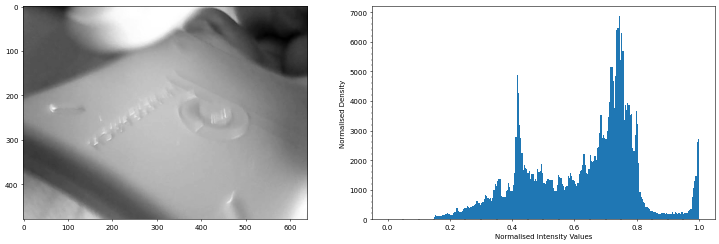

frame_i: 400, timestamp 00:03:333.333


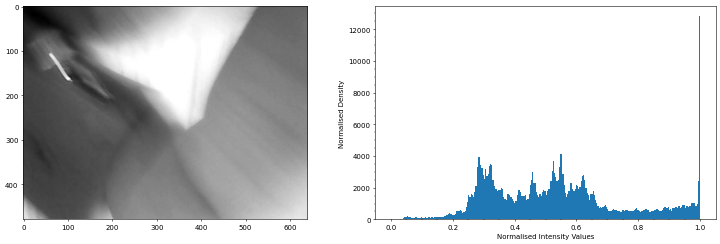

In [4]:
display_factor = 400    
texture_analysis_array = compute_texture_array_and_plot(video, frames_timestamp, display_factor)



# Plotting texture analysis of all frames in the video

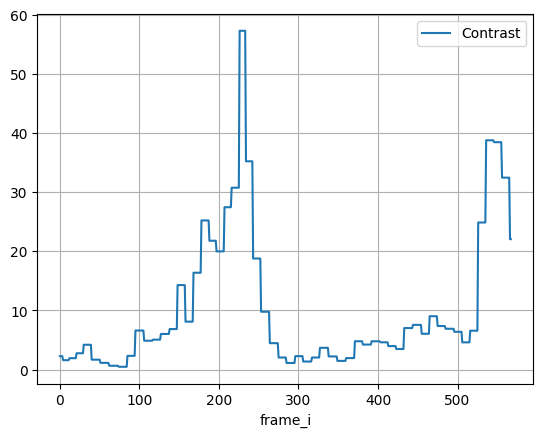

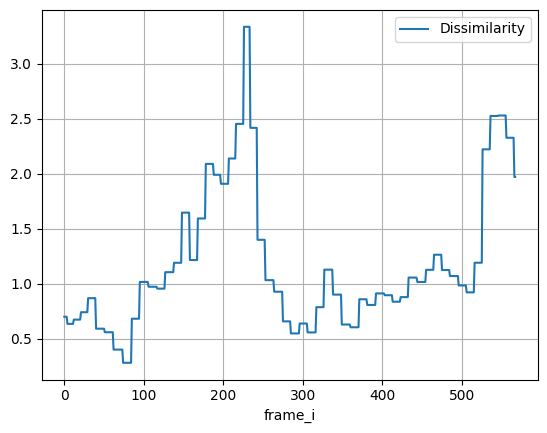

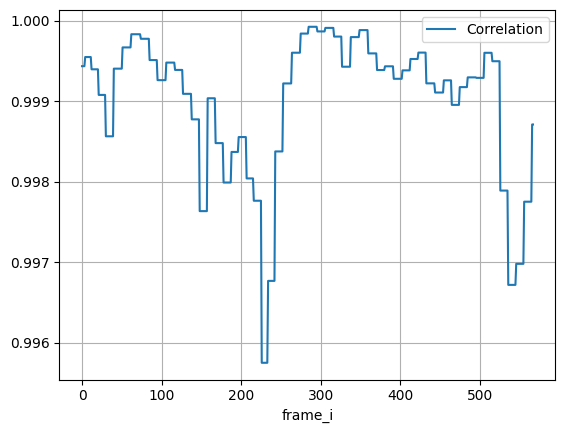

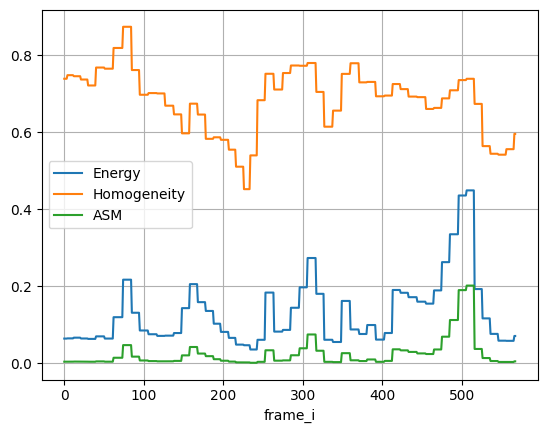

In [5]:

df_texture_analysis = get_and_plot_data_frame_of_texture_analysis(texture_analysis_array, total_number_of_frames)


In [6]:
print(df_texture_analysis)


     frame_i   Contrast  Correlation  Dissimilarity    Energy  Homogeneity  \
0          0   2.259885     0.999438       0.701382  0.064177     0.739510   
1          1   2.259885     0.999438       0.701382  0.064177     0.739510   
2          2   2.259885     0.999438       0.701382  0.064177     0.739510   
3          3   2.259885     0.999438       0.701382  0.064177     0.739510   
4          4   1.578508     0.999551       0.636633  0.064697     0.748815   
..       ...        ...          ...            ...       ...          ...   
563      563  32.456961     0.997752       2.326516  0.058320     0.556457   
564      564  32.456961     0.997752       2.326516  0.058320     0.556457   
565      565  32.456961     0.997752       2.326516  0.058320     0.556457   
566      566  22.047829     0.998713       1.970664  0.070978     0.596332   
567      567  22.047829     0.998713       1.970664  0.070978     0.596332   

          ASM  
0    0.004119  
1    0.004119  
2    0.004119  

## Reading and ploting csv files

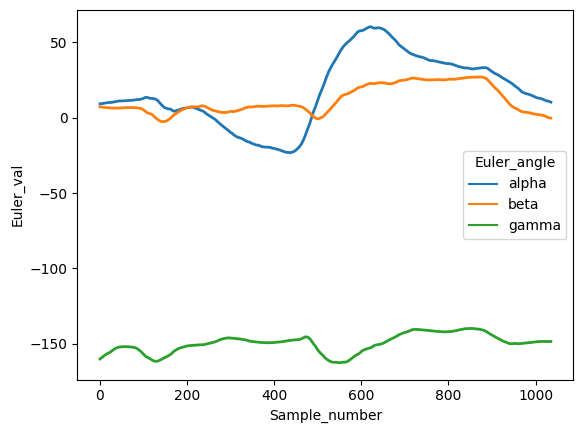

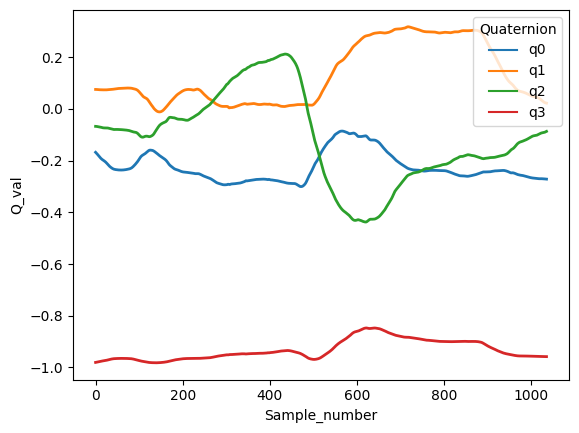

In [7]:
    df, ndf, nqdf = get_and_plot_imu_data_analysis(FULL_PATH_AND_CSV_FILE)


In [8]:
ndf

,Sample_number,Euler_angle,Euler_val
0,0,alpha,9.153045
1,1,alpha,9.174279
2,2,alpha,9.203747
3,3,alpha,9.241601
4,4,alpha,9.284740
...,...,...,...
3103,1031,gamma,-148.436356
3104,1032,gamma,-148.417435
3105,1033,gamma,-148.395721
3106,1034,gamma,-148.376678


In [9]:
nqdf

,Sample_number,Quaternion,Q_val
0,0,q0,-0.167933
1,1,q0,-0.169653
2,2,q0,-0.171454
3,3,q0,-0.173328
4,4,q0,-0.175285
...,...,...,...
4139,1031,q3,-0.958056
4140,1032,q3,-0.958088
4141,1033,q3,-0.958120
4142,1034,q3,-0.958154
